In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab 

import random
import rpy2.robjects as robjects

%matplotlib inline
sns.set_style(style='whitegrid')

/Users/dorotamierzwa/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/dorotamierzwa/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: During startup - 
  warnings.warn(x, RRuntimeWarning)
/Users/dorotamierzwa/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Warning messages:

  warnings.warn(x, RRuntimeWarning)
/Users/dorotamierzwa/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 1: Setting LC_COLLATE failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/Users/dorotamierzwa/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 2: Setting LC_TIME failed, using "C" 

  warnings.warn(x, RRuntimeWarning)
/Users/dorotamierzwa/anac

** 8 (a) Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output.**

In [2]:
auto = pd.read_csv('Auto.csv', na_values=['?', 'NaN'])
auto = auto.dropna()
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
auto_lm = smf.ols('mpg ~ horsepower', auto).fit()
auto_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 31 Mar 2018   Prob (F-statistic):           7.03e-81
Time:                        12:49:05   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Is there a relationship between the predictor and the response?
* F-statistic is far from zero, the p-value is very small, coefficients are large compared to their standard errors, therefore we can reject the null hypothesis that B1 is equal to zero.

In [4]:
# RSS 
RSS1 = ((auto['mpg'] - (auto_lm.params[0] + auto_lm.params[1] * auto['horsepower']))**2).sum()
# RSE
cnt1 = auto['horsepower'].count()
RSE1 = np.sqrt(RSS1/(cnt1-2))
print('RSE: ', RSE1)

# mean value of the response
mpg_mean = auto['mpg'].mean()
print('mpg mean: ', mpg_mean)

# percentage error
p_error = RSE1 / mpg_mean
print('Percentage error: ', p_error)

RSE:  4.90575691955
mpg mean:  23.44591836734694
Percentage error:  0.209237140669


How strong is the relationship between the predictor and the response?
* Relation between mpg and horsepower can be considered relatively strong, percentage error is 20% which is quite high, and based on the R-squared value - around 60% of response variablity can be explained by the horsepower predictor.

Is the relationship between the predictor and the response positive or negative?
* It is negative, which is indicated by a horsepower coefficient lower than zero.

What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [5]:
new_exog=pd.DataFrame({'horsepower':[98]})

In [6]:
auto_lm.predict(exog=new_exog)

0    24.467077
dtype: float64

**(b) Plot the response and the predictor. Use the abline() function to display the least squares regression line.**

Text(0,0.5,'mpg')

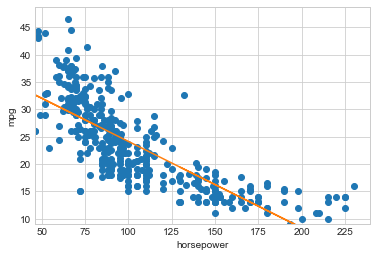

In [7]:
plt.plot(auto['horsepower'],auto['mpg'],'o', 
         auto['horsepower'],auto_lm.params[1]*auto['horsepower']+auto_lm.params[0],'-')
plt.xlim(min(auto['horsepower']))
plt.ylim(min(auto['mpg']))
plt.xlabel('horsepower')
plt.ylabel('mpg')

**(c) Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.**

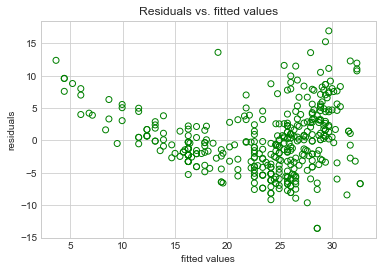

In [8]:
residuals = auto_lm.resid.values
fittedvals = auto_lm.fittedvalues.values

plt.scatter(fittedvals, residuals, facecolor='none', edgecolors='g')
plt.xlabel('fitted values');
plt.ylabel('residuals')
plt.title('Residuals vs. fitted values');

There seems to be a linear relationship, which isn't a sign of a good model.

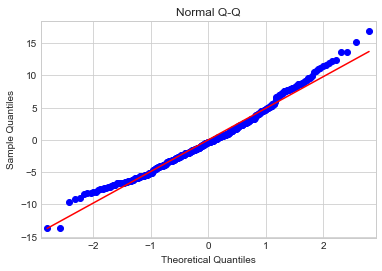

In [9]:
sm.qqplot(residuals, line='s')
plt.title('Normal Q-Q');

Q-Q plots take your sample data, sort it in ascending order, and then plot them versus quantiles calculated from a theoretical distribution. 
Quantile-Quantile plot lets us to check whether residuals are normally distributed. Here we can assume they more or less are.

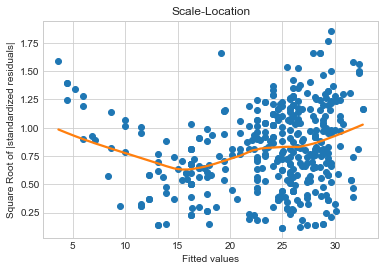

In [10]:
plt.plot(fittedvals, abs(auto_lm.resid_pearson)**.5,  'o')
sns.regplot(fittedvals, abs(auto_lm.resid_pearson)**.5, ci=None, scatter=False, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Square Root of |standardized residuals|')
plt.title('Scale-Location');

This plot shows if residuals are spread equally along the ranges of predictors. It’s good if you see a horizontal line with equally (randomly) spread points. The line on the plot is quite close to a horizontal line, however there is some pattern in the plotted values.

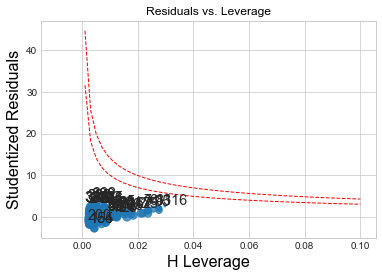

In [11]:
sm.graphics.influence_plot(auto_lm, criterion = 'Cooks', size = 2)
plt.title('Residuals vs. Leverage')

def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')
p = len(auto_lm.params) # number of model parameters
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.1, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.1, 50)) # 1 line;

Unlike the other plots, this time patterns are not relevant. We watch out for outlying values at the upper right corner or at the lower right corner, excluding them from a model will have a significant impact on the model. Although close to the Cook's distance lines, none of the values exceed them.

** 9. This question involves the use of multiple linear regression on the Auto data set.**

**(a) Produce a scatterplot matrix which includes all of the variables in the data set.**

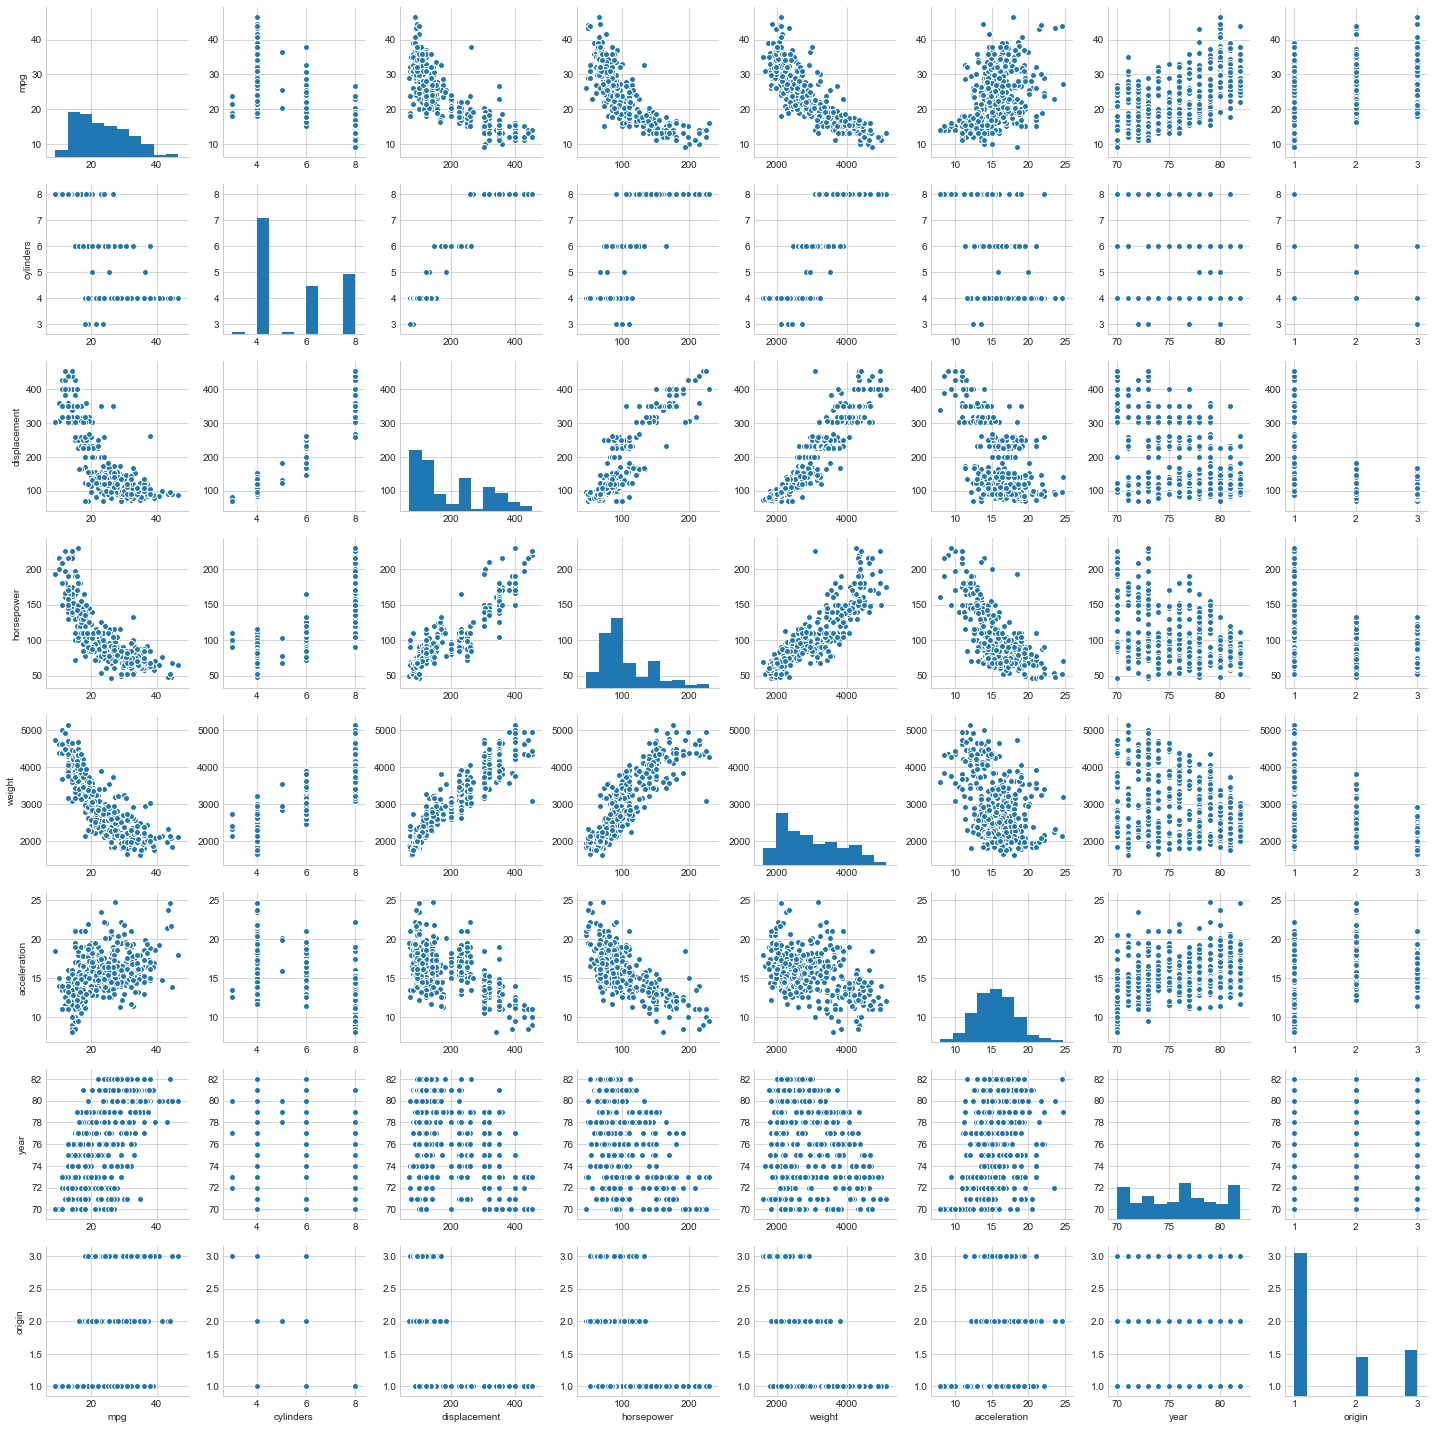

In [12]:
sns.pairplot(data=auto);

**(b) Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, which is qualitative.**

In [13]:
auto[:-1].corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777151,-0.804841,-0.778253,-0.832590,0.421421,0.579165,0.568040
cylinders,-0.777151,1.000000,0.950770,0.842865,0.897820,-0.503332,-0.343537,-0.571436
displacement,-0.804841,0.950770,1.000000,0.897168,0.933166,-0.542940,-0.368343,-0.616673
horsepower,-0.778253,0.842865,0.897168,1.000000,0.864564,-0.689133,-0.415522,-0.456742
weight,-0.832590,0.897820,0.933166,0.864564,1.000000,-0.416847,-0.308945,-0.586016
acceleration,0.421421,-0.503332,-0.542940,-0.689133,-0.416847,1.000000,0.286153,0.215997
year,0.579165,-0.343537,-0.368343,-0.415522,-0.308945,0.286153,1.000000,0.185284
origin,0.568040,-0.571436,-0.616673,-0.456742,-0.586016,0.215997,0.185284,1.000000


**(c)  Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output.**

In [14]:
auto_lm2 = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year +origin', auto).fit()
auto_lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 31 Mar 2018   Prob (F-statistic):          2.04e-139
Time:                        12:53:39   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

i. Is there a relationship between the predictors and the response?

Loooking at F-statistic there is a relationship. 

ii.  Which predictors appear to have a statistically significant relationship to the response?

Based on low p-values we can take a closer look into weight and origin predictors.

iii. What does the coefficient for the year variable suggest?

That a change of 1 in year varialble means an addition of 0.75 in mpg value.

**(c) Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?**

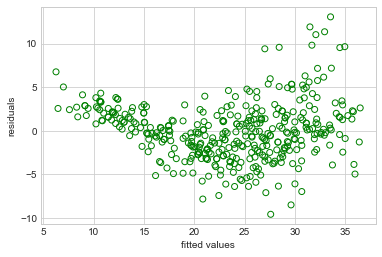

In [15]:
residuals2 = auto_lm2.resid.values
fittedvals2 = auto_lm2.fittedvalues.values

plt.scatter(fittedvals2, residuals2, facecolor='none', edgecolors='g')
plt.xlabel('fitted values');
plt.ylabel('residuals');

**(e) Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant? **

In [16]:
# adding an interaction term of two highest correlated predictors cylinders and displacement
auto_i = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + cylinders*displacement', auto).fit()
auto_i.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     264.1
Date:                Sat, 31 Mar 2018   Prob (F-statistic):          9.73e-151
Time:                        13:08:52   Log-Likelihood:                -993.83
No. Observations:                 392   AIC:                             2006.
Df Residuals:                     383   BIC:                             2041.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -2.7097      4.686     -0.578      0.563     -11.923       6.504
cylinders                 -2.6962      0.409     -6.584      0.000      -3.501      -1.891
displacement              -0.0775      0.014     -5.474      0.000      -0.105      -0.050
horsepower                -0.0476      0.013     -3.559      0.000      -0.074      -0.021
weight                    -0.0052      0.001     -8.370      0.000      -0.006      -0.004
acceleration               0.0598      0.092      0.651      0.515      -0.121       0.240
year                       0.7595      0.047     16.044      0.000       0.666       0.853
origin                     0.7087      0.274      2.590      0.010       0.171       1.247
cylinders:displacement     0.0136      0.002      7.907      0.000       0.010       0.017
==============================================================================
Omnibus:                       35.211   Durbin-Watson:                   1.456
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.581
Skew:                           0.432   Prob(JB):                     5.82e-20
Kurtosis:                       5.162   Cond. No.                     1.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared value increased a little bit from 0.821 to 0.847, meaning more variance is explained by a model with an interaction effect.

In [17]:
# adding an one more interaction term of next highest correlated predictors weight and displacement
auto_i1 = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year +origin + cylinders*displacement + cylinders*weight', auto).fit()
auto_i1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sat, 31 Mar 2018   Prob (F-statistic):          2.80e-153
Time:                        13:09:27   Log-Likelihood:                -984.91
No. Observations:                 392   AIC:                             1990.
Df Residuals:                     382   BIC:                             2030.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6.6255      5.092      1.301      0.194      -3.386      16.638
cylinders                 -4.8225      0.644     -7.490      0.000      -6.088      -3.557
displacement              -0.0009      0.023     -0.039      0.969      -0.046       0.044
horsepower                -0.0349      0.013     -2.598      0.010      -0.061      -0.008
weight                    -0.0137      0.002     -6.534      0.000      -0.018      -0.010
acceleration               0.0944      0.090      1.046      0.296      -0.083       0.272
year                       0.7788      0.047     16.729      0.000       0.687       0.870
origin                     0.7593      0.268      2.832      0.005       0.232       1.287
cylinders:displacement     0.0024      0.003      0.759      0.449      -0.004       0.009
cylinders:weight           0.0013      0.000      4.219      0.000       0.001       0.002
==============================================================================
Omnibus:                       44.742   Durbin-Watson:                   1.421
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.574
Skew:                           0.584   Prob(JB):                     1.19e-23
Kurtosis:                       5.259   Cond. No.                     6.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see another improvement in the R-squared value paired with low p-value for the new interaction term. However when having two interaction terms the p-value for cylinders * displacement decreased significantly, which implies it is not having an impact after all.

**(f) Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings.**

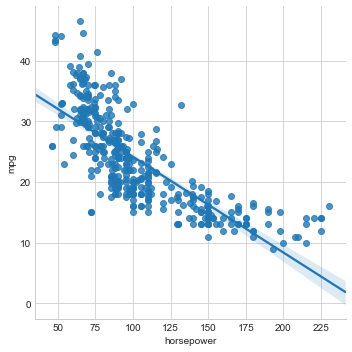

In [18]:
sns.lmplot(x='horsepower', y='mpg', data=auto)

0.668334764119


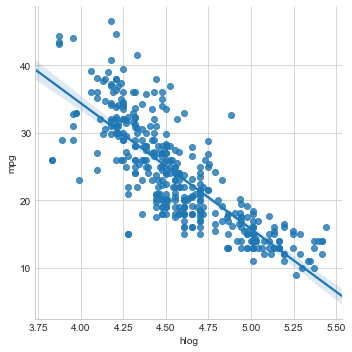

In [19]:
auto['hlog'] = np.log(auto['horsepower'])
sns.lmplot(x='hlog', y='mpg', data=auto);

auto_log = smf.ols('mpg ~ hlog', auto).fit()
print(auto_log.rsquared)

0.643703583271


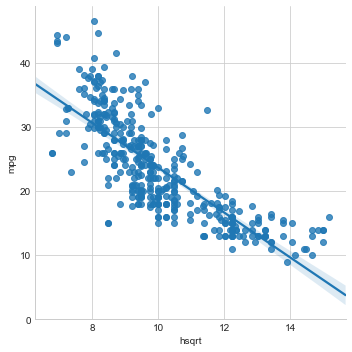

In [20]:
auto['hsqrt'] = np.sqrt(auto['horsepower'])
sns.lmplot(x='hsqrt', y='mpg', data=auto);

auto_sqrt = smf.ols('mpg ~ hsqrt', auto).fit()
print(auto_sqrt.rsquared)

**11. In this problem we will investigate the t-statistic for the null hypothesis H0 : β = 0 in simple linear regression without an intercept. To begin, we generate a predictor x and a response y as follows.**

set.seed (1)

x=rnorm(100)

y=2*x+rnorm(100)

In [21]:
random.seed(1) 
data = pd.DataFrame()
x = np.random.normal(size=100)
y = 2 * x + np.random.normal(size=100)
data['x'] = x
data['y'] = y

**(a) Perform a simple linear regression of y onto x, without an intercept. Report the coefficient estimate βˆ, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0 : β = 0. Comment on these results. (You can perform regression without an intercept using the command lm(y∼x+0).)**

In [22]:
rand_lm1 = smf.ols('y ~ x+0', data=data).fit()
rand_lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     491.1
Date:                Sat, 31 Mar 2018   Prob (F-statistic):           3.68e-40
Time:                        13:39:58   Log-Likelihood:                -134.91
No. Observations:                 100   AIC:                             271.8
Df Residuals:                      99   BIC:                             274.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              1.8956      0.086     22.160      0.000       1.726       2.065
==============================================================================
Omnibus:                        0.242   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.886   Jarque-Bera (JB):                0.423
Skew:                          -0.006   Prob(JB):                        0.809
Kurtosis:                       2.682   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(b) Now perform a simple linear regression of x onto y without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis H0 : β = 0. Comment on these results.**


In [23]:
rand_lm2 = smf.ols('x ~ y+0', data=data).fit()
rand_lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     491.1
Date:                Sat, 31 Mar 2018   Prob (F-statistic):           3.68e-40
Time:                        13:40:01   Log-Likelihood:                -61.777
No. Observations:                 100   AIC:                             125.6
Df Residuals:                      99   BIC:                             128.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.4390      0.020     22.160      0.000       0.400       0.478
==============================================================================
Omnibus:                        3.113   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                3.118
Skew:                          -0.402   Prob(JB):                        0.210
Kurtosis:                       2.683   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

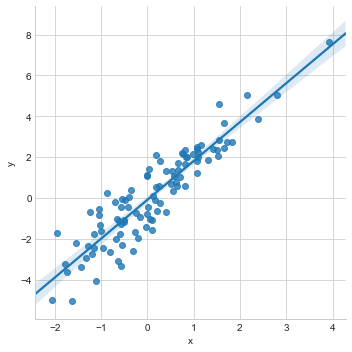

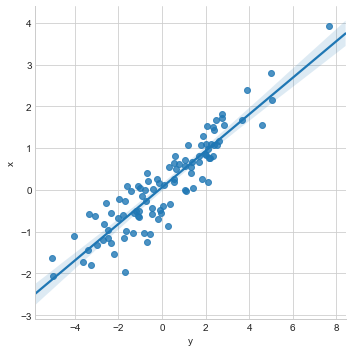

In [24]:
ax1 = sns.lmplot(x='x', y='y', data=data)
ax2 = sns.lmplot(x='y', y='x', data=data)

Both result in exactly the same line.

**13. In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use set.seed(1) prior to starting part (a) to ensure consistent results.**

**(a) Using the rnorm() function, create a vector, x, containing 100 observations drawn from a N(0,1) distribution. This represents a feature, X.**

In [25]:
random.seed(1) 
X = np.random.normal(loc=0, scale=1, size=100 )

**(b) Using the rnorm() function, create a vector, eps, containing 100 observations drawn from a N(0,0.25) distribution i.e. a normal distribution with mean zero and variance 0.25.**

In [28]:
random.seed(1) 
eps = np.random.normal(loc=0, scale=0.25, size=100)

**(c) Using x and eps, generate a vector y according to the model**

Y =−1+0.5X+ε

**What is the length of the vector y? What are the values of β0 and β1 in this linear model?**

In [29]:
y = -1 + 0.5*X + eps

In [30]:
len(y)

100

β0 = -1

β1 = 0.5 

**(d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.**

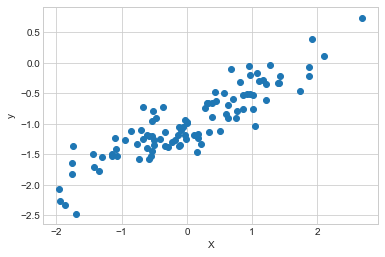

In [26]:
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y');

The two variables show a postive, linear correlation.

**(e)  Fit a least squares linear model to predict y using x. Comment on the model obtained. How do βˆ0 and βˆ1 compare to β0 and β1?**

In [31]:
data = pd.DataFrame(data=X)

In [32]:
data['Y'] = y

In [33]:
lm = smf.ols('y ~ X', data).fit()

In [34]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     541.5
Date:                Sat, 31 Mar 2018   Prob (F-statistic):           1.06e-41
Time:                        13:45:08   Log-Likelihood:                 4.8141
No. Observations:                 100   AIC:                            -5.628
Df Residuals:                      98   BIC:                           -0.4178
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9934      0.023    -42.615      0.000      -1.040      -0.947
X              0.5160      0.022     23.271      0.000       0.472       0.560
==============================================================================
Omnibus:                        2.199   Durbin-Watson:                   2.305
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.852
Skew:                           0.332   Prob(JB):                        0.396
Kurtosis:                       3.061   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 βˆ0 = -0.9934
 
 βˆ1 = 0.5160
 
Estimated oefficients are very close to the ones from model.

**(g) Now fit a polynomial regression model that predicts y using x and x2. Is there evidence that the quadratic term improves the model fit? Explain your answer.**

In [35]:
data['X_q'] = X ** 2
lm_q = smf.ols('y ~ X + X_q', data=data).fit()
lm_q.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     268.6
Date:                Sat, 31 Mar 2018   Prob (F-statistic):           2.82e-40
Time:                        13:45:27   Log-Likelihood:                 4.9097
No. Observations:                 100   AIC:                            -3.819
Df Residuals:                      97   BIC:                             3.996
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0016      0.030    -33.146      0.000      -1.062      -0.942
X              0.5143      0.023     22.738      0.000       0.469       0.559
X_q            0.0075      0.017      0.431      0.667      -0.027       0.042
==============================================================================
Omnibus:                        2.164   Durbin-Watson:                   2.319
Prob(Omnibus):                  0.339   Jarque-Bera (JB):                1.809
Skew:                           0.328   Prob(JB):                        0.405
Kurtosis:                       3.068   Cond. No.                         2.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared stayed at the same level, however the p-value of X^2 suggest that it doesn't have an impact on the outcomes.

**(h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term ε in (b). Describe your results.**

In [36]:
random.seed(1) 
X_l = np.random.normal(loc=0, scale=1, size=100 )

In [37]:
random.seed(1) 
eps_l = np.random.normal(loc=0, scale=0.10, size=100)

In [38]:
y_l = -1 + 0.5*X_l + eps_l

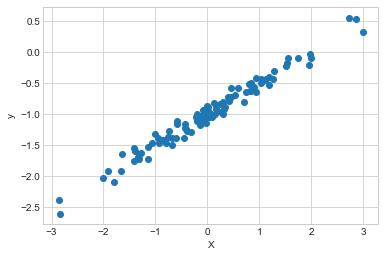

In [39]:
plt.scatter(X_l,y_l)
plt.xlabel('X')
plt.ylabel('y');

In [40]:
data_l = pd.DataFrame(data=X_l)

In [41]:
data_l['Y'] = y_l

In [42]:
lm_l = smf.ols('y_l ~ X_l', data).fit()

In [43]:
lm_l.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_l   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     3584.
Date:                Sat, 31 Mar 2018   Prob (F-statistic):           5.53e-79
Time:                        13:46:13   Log-Likelihood:                 96.206
No. Observations:                 100   AIC:                            -188.4
Df Residuals:                      98   BIC:                            -183.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9982      0.009   -106.873      0.000      -1.017      -0.980
X_l            0.5027      0.008     59.866      0.000       0.486       0.519
==============================================================================
Omnibus:                        0.950   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.622   Jarque-Bera (JB):                0.927
Skew:                          -0.042   Prob(JB):                        0.629
Kurtosis:                       2.536   Cond. No.                         1.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term ε in (b). Describe your results.**

In [44]:
random.seed(1) 
X_h = np.random.normal(loc=0, scale=1, size=100 )

In [45]:
random.seed(1) 
eps_h = np.random.normal(loc=0, scale=0.50, size=100)

In [46]:
y_h = -1 + 0.5*X_h + eps_h

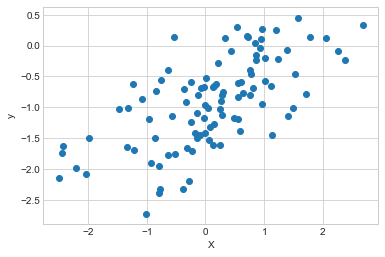

In [47]:
plt.scatter(X_h,y_h)
plt.xlabel('X')
plt.ylabel('y');

In [48]:
data_h = pd.DataFrame(data=X_h)

In [49]:
data_h['Y'] = y_h

In [50]:
lm_h = smf.ols('y_h ~ X_h', data).fit()
lm_h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_h   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     73.27
Date:                Sat, 31 Mar 2018   Prob (F-statistic):           1.60e-13
Time:                        13:46:32   Log-Likelihood:                -80.360
No. Observations:                 100   AIC:                             164.7
Df Residuals:                      98   BIC:                             169.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9585      0.055    -17.466      0.000      -1.067      -0.850
X_h            0.4488      0.052      8.560      0.000       0.345       0.553
==============================================================================
Omnibus:                        0.916   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.632   Jarque-Bera (JB):                0.991
Skew:                          -0.139   Prob(JB):                        0.609
Kurtosis:                       2.600   Cond. No.                         1.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Variance greatly influences the model fit, which is assessed with R-squared.
- initial value (var = 0.25): 0.789
- lower variance (var = 0.1: 0.973
- higher variance (var = 0.5): 0.428

Influenced are also F-statistic (higher when variance is lower) as well as coefficients are closer to the true regression with lowest variance value. P-values stay the same, indicating that the relationship is nevertheless true.

**(j) What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.**

In [51]:
lm.conf_int()

,0,1
Intercept,-1.039670,-0.947148
X,0.472038,0.560051


In [52]:
lm_l.conf_int()

,0,1
Intercept,-1.016727,-0.979658
X_l,0.486027,0.519353


In [53]:
lm_h.conf_int()

,0,1
Intercept,-1.067452,-0.849632
X_h,0.344761,0.552857


Highest variance means the broadest interval. All of them are centered around similar value, so that the broader interval include the narrower.

** 14. This problem focuses on the collinearity problem. 
Perform the following commands in R:**

set.seed(1)

x1=runif(100)

x2=0.5*x1+rnorm(100)/10

y=2+2*x1+0.3*x2+rnorm(100)

**The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?**

In [55]:
random.seed(1)
x1 = np.random.uniform(size=100)
x2=0.5*x1+np.random.normal(size=100)/10
y=2+2*x1+0.3*x2+np.random.normal(size=100)

In [56]:
df = pd.DataFrame(data=x1)
df['x2'] = x2
df['y'] = y

form of the linear model:
y = 2 + 2x1 + 0.3 x2 + e


B0 = 2
B1 = 2
B2 = 0.3

**(b) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.**

In [57]:
np.corrcoef(x1, x2)

array([[ 1.        ,  0.86461828],
       [ 0.86461828,  1.        ]])

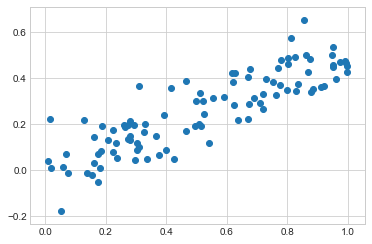

In [58]:
plt.scatter(x1, x2)

**(c) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are βˆ0, βˆ1, and βˆ2? How do these relate to the true β0, β1, and β2? Can you reject the null hypothesis H0 : β1 = 0? How about the null hypothesis H0 : β2 = 0?**

In [59]:
lmx = smf.ols('y ~ x1 + x2', data=df).fit()

In [60]:
lmx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     10.76
Date:                Sat, 31 Mar 2018   Prob (F-statistic):           6.01e-05
Time:                        13:52:21   Log-Likelihood:                -134.92
No. Observations:                 100   AIC:                             275.8
Df Residuals:                      97   BIC:                             283.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2540      0.193     11.673      0.000       1.871       2.637
x1             1.6044      0.643      2.495      0.014       0.328       2.881
x2            -0.2166      1.126     -0.192      0.848      -2.451       2.018
==============================================================================
Omnibus:                       10.788   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                3.896
Skew:                          -0.126   Prob(JB):                        0.143
Kurtosis:                       2.067   Cond. No.                         15.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

B0 = 2.25

B1 = 1.6

B2 = -0.22

The coefficients remain relatively close to those from inital regression, however also show high standard error (especially for B1 and B2). Looking at p_value, we can reject hypothesis H0. However p-value for H1 is too high and the confidence interval includes 0, therefore it cannot be rejected.

**(d) Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis H0 :β1 =0?**

In [61]:
lmx1 = smf.ols('y ~ x1', data=df).fit()
lmx1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     21.70
Date:                Sat, 31 Mar 2018   Prob (F-statistic):           1.00e-05
Time:                        13:52:54   Log-Likelihood:                -134.94
No. Observations:                 100   AIC:                             273.9
Df Residuals:                      98   BIC:                             279.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2535      0.192     11.730      0.000       1.872       2.635
x1             1.4975      0.321      4.658      0.000       0.860       2.135
==============================================================================
Omnibus:                       10.451   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                3.876
Skew:                          -0.137   Prob(JB):                        0.144
Kurtosis:                       2.075   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Yes, we can reject the null hypothesis.

**(e) Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis H0 :β1 =0?**

In [62]:
lmx2 = smf.ols('y ~ x2', data=df).fit()
lmx2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     14.52
Date:                Sat, 31 Mar 2018   Prob (F-statistic):           0.000242
Time:                        13:53:09   Log-Likelihood:                -138.03
No. Observations:                 100   AIC:                             280.1
Df Residuals:                      98   BIC:                             285.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4597      0.179     13.725      0.000       2.104       2.815
x2             2.2127      0.581      3.811      0.000       1.060       3.365
==============================================================================
Omnibus:                        3.716   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                2.941
Skew:                          -0.296   Prob(JB):                        0.230
Kurtosis:                       2.403   Cond. No.                         6.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Yes, we can reject the null hypothesis.

**(f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.**

Absolutely, looking at separate predictors we can assume there exist a relationship between each of them and a result. However in a model with both x1 and x2 we see that x2 has no impact at all. Based on high correlation between the two predictors we can assume that this is the effect of colinearity and that when we regress upon them together, the results cannot be trusted.

**15. This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors. **

**(a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.**


In [63]:
boston = pd.read_csv('Boston.csv')

In [64]:
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [65]:
boston.set_index('Unnamed: 0')
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [66]:
blm1 = smf.ols('crim ~ zn', data=boston).fit()

In [67]:
blm1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.4537,0.417,10.675,0.000,3.634,5.273
zn,-0.0739,0.016,-4.594,0.000,-0.106,-0.042


In [68]:
blm2 = smf.ols('crim ~ indus', data=boston).fit()
blm2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-2.0637,0.667,-3.093,0.002,-3.375,-0.753
indus,0.5098,0.051,9.991,0.000,0.410,0.610


In [69]:
blm3 = smf.ols('crim ~ chas', data=boston).fit()
blm3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.7444,0.396,9.453,0.000,2.966,4.523
chas,-1.8928,1.506,-1.257,0.209,-4.852,1.066


In [70]:
blm4 = smf.ols('crim ~ nox', data=boston).fit()
blm4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-13.7199,1.699,-8.073,0.000,-17.059,-10.381
nox,31.2485,2.999,10.419,0.000,25.356,37.141


In [71]:
blm5 = smf.ols('crim ~ rm', data=boston).fit()
blm5.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,20.4818,3.364,6.088,0.000,13.872,27.092
rm,-2.6841,0.532,-5.045,0.000,-3.729,-1.639


In [72]:
blm6 = smf.ols('crim ~ age', data=boston).fit()
blm6.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-3.7779,0.944,-4.002,0.000,-5.633,-1.923
age,0.1078,0.013,8.463,0.000,0.083,0.133


In [73]:
blm7 = smf.ols('crim ~ dis', data=boston).fit()
blm7.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.4993,0.730,13.006,0.000,8.064,10.934
dis,-1.5509,0.168,-9.213,0.000,-1.882,-1.220


In [74]:
blm8 = smf.ols('crim ~ rad', data=boston).fit()
blm8.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-2.2872,0.443,-5.157,0.000,-3.158,-1.416
rad,0.6179,0.034,17.998,0.000,0.550,0.685


In [75]:
blm9 = smf.ols('crim ~ tax', data=boston).fit()
blm9.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-8.5284,0.816,-10.454,0.000,-10.131,-6.926
tax,0.0297,0.002,16.099,0.000,0.026,0.033


In [76]:
blm10 = smf.ols('crim ~ ptratio', data=boston).fit()
blm10.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-17.6469,3.147,-5.607,0.000,-23.830,-11.464
ptratio,1.1520,0.169,6.801,0.000,0.819,1.485


In [77]:
blm11 = smf.ols('crim ~ black', data=boston).fit()
blm11.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,16.5535,1.426,11.609,0.000,13.752,19.355
black,-0.0363,0.004,-9.367,0.000,-0.044,-0.029


In [78]:
blm12 = smf.ols('crim ~ lstat', data=boston).fit()
blm12.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-3.3305,0.694,-4.801,0.000,-4.694,-1.968
lstat,0.5488,0.048,11.491,0.000,0.455,0.643


In [79]:
blm13 = smf.ols('crim ~ medv', data=boston).fit()
blm13.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,11.7965,0.934,12.628,0.000,9.961,13.632
medv,-0.3632,0.038,-9.460,0.000,-0.439,-0.288


Based on low p-values we can say that all predictors, except for chas, have a relationship with crime rate.

**(b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?**

In [80]:
boston.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [81]:
blm = smf.ols('crim ~ zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat +medv', data=boston).fit()
blm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Sat, 31 Mar 2018   Prob (F-statistic):           1.57e-56
Time:                        14:10:19   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.019       2.818      31.248
zn             0.0449      0.019      2.394      0.017       0.008       0.082
indus         -0.0639      0.083     -0.766      0.444      -0.228       0.100
chas          -0.7491      1.180     -0.635      0.526      -3.068       1.570
nox          -10.3135      5.276     -1.955      0.051     -20.679       0.052
rm             0.4301      0.613      0.702      0.483      -0.774       1.634
age            0.0015      0.018      0.081      0.935      -0.034       0.037
dis           -0.9872      0.282     -3.503      0.001      -1.541      -0.433
rad            0.5882      0.088      6.680      0.000       0.415       0.761
tax           -0.0038      0.005     -0.733      0.464      -0.014       0.006
ptratio       -0.2711      0.186     -1.454      0.147      -0.637       0.095
black         -0.0075      0.004     -2.052      0.041      -0.015      -0.000
lstat          0.1262      0.076      1.667      0.096      -0.023       0.275
medv          -0.1989      0.061     -3.287      0.001      -0.318      -0.080
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can reject null hypothesis for: zn, dis, rad, black and medv

**(c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regres- sion model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.**

In [82]:
x_values = [blm1.params[1],
            blm2.params[1],
            blm3.params[1],
            blm4.params[1],
            blm5.params[1],
            blm6.params[1],
            blm7.params[1],
            blm8.params[1],
            blm9.params[1],
            blm10.params[1],
            blm11.params[1],
            blm12.params[1],
            blm13.params[1]
]

In [83]:
y_values = blm.params[1:]

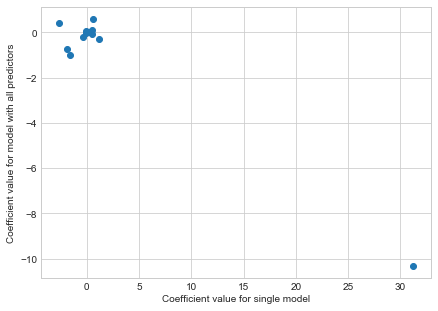

In [84]:
fig = plt.figure(figsize=(7,5))
plt.scatter(x=x_values, y=y_values)
plt.xlabel('Coefficient value for single model')
plt.ylabel('Coefficient value for model with all predictors');

Sources:

http://blog.princehonest.com/stat-learning/ch3/applied.html

http://data.library.virginia.edu/diagnostic-plots/

https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034

https://github.com/OpenNewsLabs/one-regression-six-ways/blob/master/Python/statsmodels_method.py